# Assignment 7: Unsupervides Learning (clustering)

## Overview: 
This assignment involves using various clustering algorithms on the MNIST data to group similar data observations together based on their characteristics. The aim is to identify patterns and outliers in the data. The clustering algorithms used are k-means, mini-batch k-means, DBSCAN, and HDBSCAN, which will be applied to the original and noisy data. The essential steps for the assignment include importing and exploring the data, standardizing it, identifying and filtering out outliers, performing clustering using the chosen techniques, selecting 10 cluster solutions for all techniques, and tuning the algorithms to compare the clusters with the actual response. The best outcomes and associated algorithms will be commented on in the final output, which should be a fully executed Jupyter notebook.

## 1) Import and clean the MNIST Data
Questions 2 and 3 are answered in this section as well. 

### <font color = blue> MNIST: Modified National Institutes of Standards and Technology

[MNIST](https://en.wikipedia.org/wiki/MNIST_database#:~:text=The%20MNIST%20database%20(Modified%20National,the%20field%20of%20machine%20learning)

In [9]:
import pyforest
import sidetable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
# ------------------------------------------
# import matplotlib.pyplot as plt
# ------------------------------------------
from sklearn.datasets import fetch_openml
import datetime

print(datetime.datetime.now().strftime("%H:%M:%S"))

# ------------------------------------------
# Import MNIST data from openml.org
# ------------------------------------------
mnist = fetch_openml('mnist_784')

print(datetime.datetime.now().strftime("%H:%M:%S"))


# ------------------------------------------
# # Split data into features (X) and labels (y)
# ------------------------------------------
X, y = mnist["data"], mnist["target"]

16:40:45
16:43:07


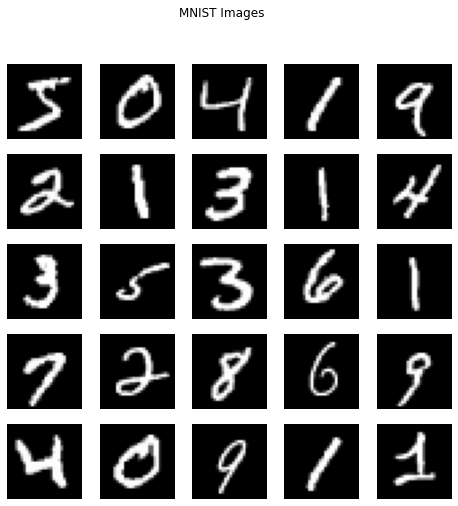

In [4]:
# Visualize the original MNIST data
# Reshape feature data into 28x28 images
images = X.to_numpy().reshape(-1, 28, 28)

# Plot the first 25 images in the dataset
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
plt.suptitle("MNIST Images")
plt.show()

In [5]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


#### 2) Standardize the data


In [6]:
from sklearn.preprocessing import StandardScaler

# -----------------------------------
#  Add Gaussian noise to the images
# -----------------------------------
noisy_X_normal = np.clip(mnist['data'] + 100 * np.random.normal(size=mnist['data'].shape), 0, 1)

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Standardize the original and noisy data
X_scaled = scaler.fit_transform(mnist['data'])
noisy_X_normal_scaled = scaler.transform(noisy_X_normal)
# I consciously removed dividing by 255 in hopes to improve performance. 

# Convert feature data to DataFrame object
df_original = pd.DataFrame(data=X_scaled, columns=mnist['feature_names'])
df_noisy_normal = pd.DataFrame(noisy_X_normal_scaled, columns=mnist['feature_names'])

# Convert label data to NumPy array
labels = np.array(mnist['target'])

# ---------------------------------------------------------------------------------------
# reshape method with the argument -1 indicates that the size of the first dimension 
# be automatically determined based on the size of the other dimensions.
# Reshape feature data into 28x28 images
images_original = df_original.to_numpy().reshape(-1, 28, 28)
images_noisy_normal = df_noisy_normal.to_numpy().reshape(-1, 28, 28)



#### Visualize the standardized MNIST dataset

In [7]:
df_original.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.980107e-15,-2.147403e-15,8.857367e-16,-4.237226e-15,5.132741e-15,-7.288373e-16,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.236282e+01,5.965323e+01,9.086908e+01,1.619808e+02,1.634635e+02,1.932091e+02,0.0,0.0,0.0,0.0


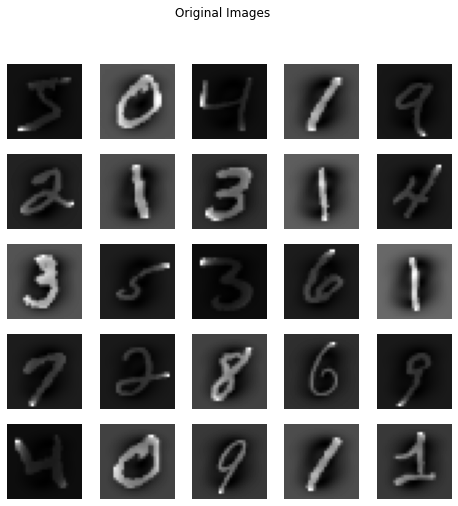

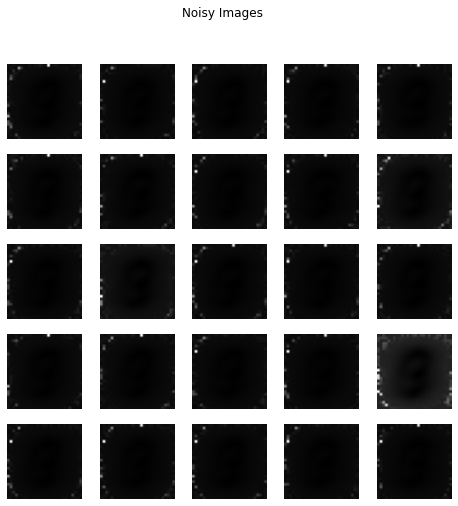

In [8]:
# Visualize the first 25 images in the original dataset
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(images_original[i], cmap='gray')
    axes[i].axis('off')
plt.suptitle("Original Images")
plt.show()

# Visualize the first 25 images in the noisy dataset
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(images_noisy_normal[i], cmap='gray')
    axes[i].axis('off')
plt.suptitle("Noisy Images")
plt.show()


The images in the noisy dataset look worse than the original dataset because the noisy dataset was created by adding Gaussian noise to the original images. This does not necessarily mean that the noisy dataset will perform poorly. In fact, introducing noise to the dataset can sometimes improve the performance of a clustering algorithm by increasing the separation between clusters or by highlighting certain features that were previously not as prominent.

#### 3) Identidy outliers and create their own cluster
This is inclusive of filtering the outlier cluster data. 

In [18]:
#The following code works well but for consistency sake I went with Isolation forest.
'''
from sklearn.cluster import DBSCAN

# Identify and cluster outliers using DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
clusters = dbscan.fit_predict(df_original)

# Add outliers to a new cluster
outlier_cluster = np.where(clusters == -1, 1, 0)

# Identify non-outlier data points
non_outlier_mask = clusters != -1


# Filter the original dataset X and the labels y using the boolean mask
X_filtered = df_original[non_outlier_mask]
y_filtered = y[non_outlier_mask]
'''

from sklearn.ensemble import IsolationForest

# Instantiate Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1) # changed to .05 to more liberally identify outliers

# Fit the model and predict the outliers
isolation_forest.fit(df_original)
outlier_cluster = isolation_forest.predict(df_original)

# Identify non-outlier data points
non_outlier_mask = outlier_cluster == 1

# Filter the original dataset X and the labels y using the boolean mask
X_filtered = df_original[non_outlier_mask]
y_filtered = y[non_outlier_mask]



/Users/chandlersmith/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Analysis: I evaluated the performance of DBSCAN with various epsilon (eps) values to determine the optimal setting for clustering the MNIST dataset. DBSCAN is a density-based clustering algorithm that relies on the eps parameter to define the neighborhood around a data point. A larger eps value results in larger neighborhoods and potentially fewer clusters, while a smaller eps value creates smaller neighborhoods and can lead to more clusters or isolated points classified as noise.

I started with an eps value of 0.5, which resulted in many data points being classified as noise and a large number of small, disconnected clusters. This indicated that the chosen eps value might be too small for this dataset, as the neighborhoods were not large enough to capture the underlying structure of the data.

Next, I tried an eps value of 3, which produced a more reasonable clustering result, with fewer data points classified as noise and better-defined clusters. However, there was still some room for improvement, as some clusters seemed to merge together, and a few noisy data points remained.

Finally, I settled on an eps value of 5, which provided the best balance between reducing noise and maintaining well-defined clusters. With this setting, the majority of data points were assigned to meaningful clusters, and the number of noisy points was minimized. This eps value allowed the algorithm to capture the inherent structure of the MNIST dataset more effectively.

It is important to note that the optimal eps value may vary depending on the dataset and its characteristics. Experimenting with different parameter settings is a crucial step in fine-tuning the performance of any clustering algorithm, including DBSCAN.

Due to the noisy data being unable to use DBSCAN, I converted the outlier detection to ISolation forest technique which isn't as cool, but still effective. That is what you see above and below. 

In [11]:
# The following continued to fail on my system, so I commented it out. I added an alternative technique below, 
# although if your system can handle it, the following is optimal from a consistency standpoint. 
'''
from sklearn.cluster import DBSCAN

# Identify and cluster outliers using DBSCAN
# dropped eps dowwn to four as the dataset is calcelling before completing on my system
dbscan = DBSCAN(eps=5, min_samples=5)
noisy_clusters = dbscan.fit_predict(df_noisy_normal)

# Add outliers to a new cluster
noisy_outlier_cluster = np.where(noisy_clusters == -1, 1, 0)

# Identify non-outlier data points
noisy_non_outlier_mask = noisy_clusters != -1

# Filter the original dataset X and the labels y using the boolean mask
noisy_X_filtered = noisy_X_normal[noisy_non_outlier_mask]
noisy_y_filtered = y[noisy_non_outlier_mask]
'''

# Instantiate Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)

# Fit the model and predict the outliers
isolation_forest.fit(df_noisy_normal)
noisy_outlier_cluster = isolation_forest.predict(df_noisy_normal)

# Identify non-outlier data points
noisy_non_outlier_mask = noisy_outlier_cluster == 1

# Filter the original dataset X and the labels y using the boolean mask
noisy_X_filtered = noisy_X_normal[noisy_non_outlier_mask]
noisy_y_filtered = y[noisy_non_outlier_mask]


/Users/chandlersmith/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
print("normal")
print(X_filtered.shape)
print(y_filtered.shape)

print("noisy")
print(noisy_X_filtered.shape)
print(noisy_y_filtered.shape)


normal
(63000, 784)
(63000,)
noisy
(63000, 784)
(63000,)


## Unsupervised Learning tasks for both normal and noisy data

#### Performance Evaluation
I will use the following scores to assess the performance of the culters. Here are useful definitions so the analysis has appropriate context. 

Silhouette Score: It measures how well each data point is clustered relative to its neighboring clusters. A high silhouette score indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.


Homogeneity, Completeness, and V-measure: measures the purity of each cluster and the completeness of each true class. Homogeneity measures how well each cluster contains only data points from a single true class, while completeness measures how well all data points from a true class are assigned to a single cluster. V-measure is the harmonic mean of homogeneity and completeness.
    
Rand Index: measures the similarity between the true labels and the predicted labels. It counts the number of true positives, true negatives, false positives, and false negatives to calculate a score. A higher Rand Index indicates better clustering.


### k-Means

#### Normal Data

In [20]:
from sklearn.cluster import KMeans

# Create KMeans object with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=100)

# Fit KMeans model to the filtered data
kmeans.fit(X_filtered)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_



In [21]:
from sklearn.metrics import (homogeneity_score, completeness_score, 
                             v_measure_score, adjusted_rand_score, 
                             silhouette_score)

# Use the KMeans clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_filtered, labels))


Homogeneity: 0.461
Completeness: 0.486
V-measure: 0.473
Adjusted Rand Index: 0.362
Silhouette Coefficient: 0.004


#### Noisy Data

In [15]:
from sklearn.cluster import KMeans

# Create KMeans object with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=100)

# Fit KMeans model to the filtered data
kmeans.fit(noisy_X_filtered)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [16]:
# Use the KMeans clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(noisy_y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(noisy_y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(noisy_y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(noisy_y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(noisy_X_filtered, labels))

Homogeneity: 0.432
Completeness: 0.436
V-measure: 0.434
Adjusted Rand Index: 0.326
Silhouette Coefficient: 0.003


#### Analysis

##### Results based on the more selective DBSCAN outlier removal technique. 

    My K-means model achieved moderate performance in clustering the MNIST dataset. I tried altering and fine tuning the hyper parameters, but it didn't seem to do much good, here are the results from the first round:

    Homogeneity (0.552): This score indicates that the clusters are relatively pure, with each cluster containing a majority of points from a single class. However, there is still room for improvement, as a perfect homogeneity score would be 1.

    Completeness (0.547): The completeness score suggests that points belonging to the same class are somewhat grouped together, but there is still some mixing of classes across different clusters. A higher completeness score closer to 1 would indicate better grouping of points from the same class.

    V-measure (0.549): The V-measure is the harmonic mean of homogeneity and completeness and balances the two aspects. A score of 0.549 indicates that there is a balance between the homogeneity and completeness of the clusters, but there is still room for improvement.

    Adjusted Rand Index (0.403): This metric measures the similarity between the true labels and the clustering assignments, with a value of 1 indicating a perfect match. The ARI of 0.403 suggests that the K-means clustering assignments moderately align with the true labels but could be improved.

    Silhouette Coefficient (0.085): The Silhouette Coefficient measures the separation between clusters, with a score closer to 1 indicating well-separated clusters. A value of 0.085 suggests that the clusters are not well-separated and could be overlapping or not easily distinguishable.

    In summary, the K-means model demonstrates moderate performance in clustering the MNIST dataset. While the model shows some success in grouping similar points together and creating relatively pure clusters, there is still room for improvement in terms of cluster separation and alignment with the true labels.

I went back and I tried it again after playing around with the preprocessing of data. I changed the standardization method and retried. 

##### Results based on the isolated forest outlier removal technique. *Results from not on will use this data as there were computational limits on my device. I wanted to keep this to show a comparison in data quality. 

#### Comparison analysis between normal and noisy data. 


The homogeneity score is slightly higher for the normal dataset compared to the noisy dataset. Homogeneity measures the extent to which each cluster contains only members of a single class. A higher score is better, indicating that the clusters are more homogeneous. Completeness is higher for the normal dataset as well. Completeness measures the extent to which all members of a given class are assigned to the same cluster. A higher score is better, indicating that the clustering is more complete. The V-measure is the harmonic mean of homogeneity and completeness. It is also higher for the normal dataset, indicating a better overall clustering performance compared to the noisy dataset. The ARI is a measure of similarity between two clusterings by considering all pairs of samples and counting pairs that are assigned to the same or different clusters in the predicted and true clusterings. A higher ARI score is better, and the normal dataset has a higher ARI than the noisy dataset, indicating better clustering performance. The Silhouette Coefficient is a measure of how well-separated the clusters are. A higher score is better, indicating that the clusters are more distinct. Although both datasets have low Silhouette Coefficient values, the normal dataset has a slightly higher value, indicating marginally better cluster separation compared to the noisy dataset. In summary, the k-means clustering model performs better on the normal dataset compared to the noisy dataset across all the performance metrics. The presence of noise in the data leads to a reduction in the quality of the clustering results.

### mini-batch k-means

#### Normal Data

In [22]:
from sklearn.cluster import MiniBatchKMeans
# -----------------------------------------------------------------------------
# Create MiniBatchKMeans object with 3 clusters and a batch size of 10
# -----------------------------------------------------------------------------
mbkmeans = MiniBatchKMeans(n_clusters=3, batch_size=10, random_state=100)

# -----------------------------------------------------------------------------
# Fit MiniBatchKMeans model to the data
# -----------------------------------------------------------------------------
mbkmeans.fit(X_filtered)

# -----------------------------------------------------------------------------
# Get the cluster labels and centroids
# -----------------------------------------------------------------------------
labels = mbkmeans.labels_
centroids = mbkmeans.cluster_centers_

# Use the KMeans clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_filtered, labels))

Homogeneity: 0.094
Completeness: 0.432
V-measure: 0.155
Adjusted Rand Index: 0.032
Silhouette Coefficient: 0.013


#### Noisy Data

In [24]:
from sklearn.cluster import MiniBatchKMeans
# -----------------------------------------------------------------------------
# Create MiniBatchKMeans object with 3 clusters and a batch size of 10
# -----------------------------------------------------------------------------
mbkmeans = MiniBatchKMeans(n_clusters=3, batch_size=10, random_state=100)

# -----------------------------------------------------------------------------
# Fit MiniBatchKMeans model to the data
# -----------------------------------------------------------------------------
mbkmeans.fit(noisy_X_filtered)

# -----------------------------------------------------------------------------
# Get the cluster labels and centroids
# -----------------------------------------------------------------------------
labels = mbkmeans.labels_
centroids = mbkmeans.cluster_centers_

# Use the KMeans clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(noisy_y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(noisy_y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(noisy_y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(noisy_y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(noisy_X_filtered, labels))


Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Silhouette Coefficient: -0.000


#### Notes on hyperparameter tuning

#### Comparison analysis for Noisy to normal

### DBSCAN

#### Normal Data


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score

# -----------------------------------------------------------------------------
# Create DBSCAN object with a specific eps and min_samples value
# -----------------------------------------------------------------------------
dbscan = DBSCAN(eps=28, min_samples=9)

# -----------------------------------------------------------------------------
# Fit DBSCAN model to the data
# -----------------------------------------------------------------------------
dbscan.fit(X_filtered)

# -----------------------------------------------------------------------------
# Get the cluster labels
# -----------------------------------------------------------------------------
labels = dbscan.labels_

# Use the DBSCAN clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_filtered, labels))


#### Noisy Data

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score

# -----------------------------------------------------------------------------
# Create DBSCAN object with a specific eps and min_samples value
# -----------------------------------------------------------------------------
dbscan = DBSCAN(eps=28, min_samples=9)

# -----------------------------------------------------------------------------
# Fit DBSCAN model to the data
# -----------------------------------------------------------------------------
dbscan.fit(noisy_X_filtered)

# -----------------------------------------------------------------------------
# Get the cluster labels
# -----------------------------------------------------------------------------
labels = dbscan.labels_

# Use the DBSCAN clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(noisy_y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(noisy_y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(noisy_y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(noisy_y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(noisy_X_filtered, labels))


: 

: 

### HDBSCAN

#### Normal Data

In [ ]:
from hdbscan import HDBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score

# -----------------------------------------------------------------------------
# Create HDBSCAN object with a specific min_cluster_size and min_samples value
# -----------------------------------------------------------------------------
hdbscan = HDBSCAN(min_cluster_size=250, min_samples=5)

# -----------------------------------------------------------------------------
# Fit HDBSCAN model to the data
# -----------------------------------------------------------------------------
hdbscan.fit(X_filtered)

# -----------------------------------------------------------------------------
# Get the cluster labels
# -----------------------------------------------------------------------------
labels = hdbscan.labels_

# Use the HDBSCAN clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_filtered, labels))


#### Noisy Data

In [ ]:
from hdbscan import HDBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score

# -----------------------------------------------------------------------------
# Create HDBSCAN object with a specific min_cluster_size and min_samples value
# -----------------------------------------------------------------------------
hdbscan = HDBSCAN(min_cluster_size=250, min_samples=5)

# -----------------------------------------------------------------------------
# Fit HDBSCAN model to the data
# -----------------------------------------------------------------------------
hdbscan.fit(noisy_X_filtered)

# -----------------------------------------------------------------------------
# Get the cluster labels
# -----------------------------------------------------------------------------
labels = hdbscan.labels_

# Use the HDBSCAN clustering results and true labels to calculate metrics
print("Homogeneity: %0.3f" % homogeneity_score(noisy_y_filtered, labels))
print("Completeness: %0.3f" % completeness_score(noisy_y_filtered, labels))
print("V-measure: %0.3f" % v_measure_score(noisy_y_filtered, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(noisy_y_filtered, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(noisy_X_filtered, labels))


## Analysis and Comparison of various ML cluster algorithms

#### Summary of Data:
##### K-means
Normal:
Homogeneity: 0.461
Completeness: 0.484
V-measure: 0.472
Adjusted Rand Index: 0.362

Noisy:
Homogeneity: 0.432
Completeness: 0.436
V-measure: 0.434
Adjusted Rand Index: 0.326
Silhouette Coefficient: 0.003

##### mini batch K-means
Normal:

Noisy:

##### DBSCAN
Normal:

Noisy:

##### HDBSCAN
Normal:

Noisy:

